<center>
<h1>Tight-Binding Calculation of the Band Structure of Silicon</h1>
<br> William M. Medlar <br>
*Department of Physics, University of North Texas, Denton, Texas*
<br><br> The band structure of Silicon is calculated using the empirical tight-binding method implemented in the Python programming language. <br> Only interactions between first nearest neighbors are taken into account. The energy splittings for Silicon at symmetry points appear <br> to be somewhat accurate to accepted values, although second neighbors will have to be examined for usable results.<br>
    
</center>

## I. Introduction

The tight-binding method is an attractive approach for its simplicity; it requires only a few empirical parameters to calculate a relatively accurate approximation of the band structure of a crystal. 

In this paper I will introduce the tight-binding method and the approximations it makes, and calculate a reasonably accurate band structure of Silicon with only six empirical parameters and the locations of a Silicon atom's nearest neighbors in real space. Calculated results are plotted and compared to accepted values and calculations from other empirical methods.

## II. Tight-Binding Method

The tight-binding method is so simple because it makes a number of approximations to get to that point. The name "tight-binding" comes from the approximation that "core" electrons -- electrons in filled orbitals --  are bound tightly to their nuclei. In the case of Silicon this corresponds to the $1s^2$, $2s^2$, and $2p^6$ orbitals, leaving the partially filled $3s$ and $3p$ shells as "valence" electrons. The tight-binding method ignores the contributions from the core electrons and instead focuses on the valence electrons, as they are responsible for bonding with other atoms.

A second approximation that we make is the Born-Oppenheimer approximation -- simply that we can ignore the small kinetic contribution from the nuclei as they are significantly heavier than the electrons, and thus much slower.

Our third approximation assumes that each electron in the atom experiences the same average potential $V(\vec{r})$ -- the "mean-field" approximation.

The tight-binding method approaches a crystal as a linear combination of the wavefunctions of isolated atoms, each with a single particle Hamiltonian of the form:

$$
H = H_{at} + \Delta U
$$

where $\Delta U$ contains the difference between the true potential of the crystal and the potential of the isolated atom. We assume that $\Delta U \rightarrow 0$ in the center of each atom. This gives single particle states of the form:

$$
H(\vec{k}) \Psi_{\vec{k}}(\vec{r}) = E_{\vec{k}} \Psi_{\vec{k}}(\vec{r})
$$

where $\vec{k}$ is a wavevector in the first Brillouin zone. This single particle does not satisfy Bloch's theorem, however we can construct a linear combination of orbitals that do:

$$
\psi_{\vec{k}}(\vec{r}) = \frac{1}{\sqrt{n}} \sum\limits_{\vec{R}} e^{\mathrm{i} \: \vec{k} \cdot \vec{R}} \: \phi(\vec{r} - \vec{R})
$$

where $\vec{R}$ is a translation vector in real space and $\phi(\vec{r})$ is the atomic wavefunction that is an eigenstate of our earlier atomic Hamiltonian $H_{at}$. Our eigenfunctions of $H(\vec{k})$ are given by:

$$
\Psi(\vec{k}) = \sum\limits_{i} C_i \psi_i(\vec{k})
$$

where our coefficients $C_i$ come from the minimization of the Rayleigh ratio. This leads to the eigenvalue problem:

$$
\sum\limits_{i,j} \left( H_{i,j} - E(\vec{k}) \delta_{i,j} \right) = 0
$$

For a Silicon basis of $3s$, $3p_x$, $3p_y$, $3p_z$ centered around each atom this will correspond to a matrix of the form:

$$
\left(
\begin{array}{cccccccc}
E_s & V_{ss} g_1 & 0 & 0 & 0 & V_{sp} g_2 & V_{sp} g_3 & V_{sp} g_4 \\
V_{ss} g_1^* & E_s & -V_{sp} g_2^* & V_{sp} g_3^* & -V_{sp} g_4^* & 0 & 0 & 0 \\
0 & -V_{sp} g_2 & E_p & 0 & 0 & V_{xx} g_1 & V_{xy} g_4 & V_{xy} g_2 \\
0 & -V_{sp} g_3 & 0 & E_p & 0 & V_{xy} g_4 & V_{xx} g_1 & V_{xy} g_2 \\
0 & -V_{sp} g_3 & 0 & 0 & E_p & V_{xy} g_2 & V_{xy} g_3 & V_{xx} g_1 \\
V_{sp} g_2^* & 0 & V_{xx} g_1^* & V_{xy} g_4^* & V_{xy} g_2^* & E_p & 0 & 0 \\
V_{sp} g_3^* & 0 & V_{xy} g_4^* & V_{xx} g_1^* & V_{xy} g_3^* & 0 & E_p & 0 \\
V_{sp} g_4^* & 0 & V_{xy} g_2^* & V_{xy} g_2^* & V_{xx} g_1^* & 0 & 0 & E_p
\end{array}
\right)
$$

where $g_n$ are functions of $\vec{k}$ and the nearest neighbors $\vec{d_n}$ given by:

$$
g_1(\vec{k}) = \frac{1}{4} \left( e^{\mathrm{i} \vec{k} \cdot \vec{d_1}} + e^{\mathrm{i} \vec{k} \cdot \vec{d_2}} + e^{\mathrm{i} \vec{k} \cdot \vec{d_3}} + e^{\mathrm{i} \vec{k} \cdot \vec{d_4}}\right) \\
g_2(\vec{k}) = \frac{1}{4} \left( e^{\mathrm{i} \vec{k} \cdot \vec{d_1}} + e^{\mathrm{i} \vec{k} \cdot \vec{d_2}} - e^{\mathrm{i} \vec{k} \cdot \vec{d_3}} - e^{\mathrm{i} \vec{k} \cdot \vec{d_4}}\right) \\
g_3(\vec{k}) = \frac{1}{4} \left( e^{\mathrm{i} \vec{k} \cdot \vec{d_1}} - e^{\mathrm{i} \vec{k} \cdot \vec{d_2}} + e^{\mathrm{i} \vec{k} \cdot \vec{d_3}} - e^{\mathrm{i} \vec{k} \cdot \vec{d_4}}\right) \\
g_4(\vec{k}) = \frac{1}{4} \left( e^{\mathrm{i} \vec{k} \cdot \vec{d_1}} - e^{\mathrm{i} \vec{k} \cdot \vec{d_2}} - e^{\mathrm{i} \vec{k} \cdot \vec{d_3}} + e^{\mathrm{i} \vec{k} \cdot \vec{d_4}}\right)
$$

All that's left now is to calculate our eigenvalues.

## III. Implementation

Before we can build our matrix, we'll have to calculate our $g_n(\vec{k})$ functions. These are complex scalars that adjust our potential parameters in elements where they are nonzero. The four definitions we have for $g_n(\vec{k})$ can be condensed into one by making use of Python 3.5's new matrix multiplication operator, @.

In [94]:
import numpy as np

def phase(k, neighbors):
    '''
    Determines phase factors of overlap parameters using the assumption that the
    orbitals of each crystal overlap only with those of its nearest neighbor.
    
    args:
        k: A numpy array of shape (3,) that represents the k-point at which to
           calculate phase factors.
        neighbors: A numpy array of shape (4, 3) that represents the four nearest
                   neighbors in the lattice of an atom centered at (0, 0, 0).
                   
    returns:
        A numpy array of shape (4,) containing the (complex) phase factors.
    '''
    
    a, b, c, d = [np.exp(1j * k @ neighbor) for neighbor in neighbors]
    factors = np.array([
        a + b + c + d,
        a + b - c - d,
        a - b + c - d,
        a - b - c + d
    ])
    return (1 / 4) * factors

With the appropriate "phase factors" $g_n(\vec{k})$ and empirical parameters we can build our Hamiltonian. This Hamiltonian is self-adjoint, thus $H = H^\dagger$ and we should use the appropriate NumPy method, ```numpy.linalg.eigvalsh``` instead of ```eigvals``` to ensure we get real eigenvalues.

In [95]:
def band_energies(g, es, ep, vss, vsp, vxx, vxy):
    '''
    Calculates the band energies (eigenvalues) of a material using the
    tight-binding approximation for single nearest-neighbor interactions.
    
    args:
        g: A numpy array of shape (4,) representing the phase factors with respect
           to a wavevector k and the crystal's nearest neighbors.
        es, ep, vss, vsp, vxx, vxy: Empirical parameters for orbital overlap
                                    interactions between nearest neighbors.
                                    
    returns:
        A numpy array of shape (8,) containing the eigenvalues of the
        corresponding Hamiltonian.
    '''
    
    gc = np.conjugate(g)

    hamiltonian = np.array([
        [         es,  vss * g[0],            0,            0,            0, vsp * g[1], vsp * g[2], vsp * g[3]],
        [vss * gc[0],          es, -vsp * gc[1], -vsp * gc[2], -vsp * gc[3],          0,          0,          0],
        [          0, -vsp * g[1],           ep,            0,            0, vxx * g[0], vxy * g[3], vxy * g[1]],
        [          0, -vsp * g[2],            0,           ep,            0, vxy * g[3], vxx * g[0], vxy * g[1]],
        [          0, -vsp * g[3],            0,            0,           ep, vxy * g[1], vxy * g[2], vxx * g[0]],
        [vsp * gc[1],           0,  vxx * gc[0],  vxy * gc[3],  vxy * gc[1],         ep,         0,           0],
        [vsp * gc[2],           0,  vxy * gc[3],  vxx * gc[0],  vxy * gc[2],          0,        ep,           0],
        [vsp * gc[3],           0,  vxy * gc[1],  vxy * gc[1],  vxx * gc[0],          0,         0,          ep]
    ])

    eigvals = np.linalg.eigvalsh(hamiltonian)
    eigvals.sort()
    return eigvals

Below is the function we'll call to calculate our band structure across a path of k-points.

In [96]:
def band_structure(params, neighbors, path):
    
    bands = []
    
    for k in np.vstack(path):
        g = phase(k, neighbors)
        eigvals = band_energies(g, *params)
        bands.append(eigvals)
        
    return np.stack(bands, axis=-1)

```linpath``` is a function taken from an earlier project of mine, and will be useful in creating a path of n k-points across the first Brillouin zone.

In [97]:
def linpath(a, b, n=50, endpoint=True):
    '''
    Creates an array of n equally spaced points along the path a -> b, not inclusive.

    args:
        a: An iterable of numbers that represents the starting position.
        b: An iterable of numbers that represents the ending position.
        n: The integer number of sample points to calculate. Defaults to 50.
        
    returns:
        A numpy array of shape (n, k) where k is the shortest length of either
        iterable -- a or b.
    '''
    # list of n linear spacings between the start and end of each corresponding point
    spacings = [np.linspace(start, end, num=n, endpoint=endpoint) for start, end in zip(a, b)]
    
    # stacks along their last axis, transforming a list of spacings into an array of points of len n
    return np.stack(spacings, axis=-1)

Below we set up our empirical parameters, from Chadi and Cohen$^2$. $E_s$ and $E_p$ are arbitrary as long as they obey $E_p - E_s = 7.20$. $E_s$ determines the zero of the energy, thus I've adjusted it so that the peak of the valence bands is set at 0, as is common convention.

I've used 1000 sample k-points per path between symmetry points to get a very smooth graph. Diagonalizing an 8x8 matrix is a very quick task for a computer, so it doesn't hurt to push it a little.

In [98]:
# Es, Ep, Vss, Vsp, Vxx, Vxy
# Ep - Es = 7.20
params = (-4.03, 3.17, -8.13, 5.88, 3.17, 7.51)

# k-points per path
n = 1000

# lattice constant
a = 1

# nearest neighbors to atom at (0, 0, 0)
neighbors = a / 4 *  np.array([
    [1, 1, 1],
    [1, -1, -1],
    [-1, 1, -1],
    [-1, -1, 1]
])

# symmetry points in the Brillouin zone
G = 2 * np.pi / a * np.array([0, 0, 0])
L = 2 * np.pi / a * np.array([1/2, 1/2, 1/2])
K = 2 * np.pi / a * np.array([3/4, 3/4, 0])
X = 2 * np.pi / a * np.array([0, 0, 1])
W = 2 * np.pi / a * np.array([1, 1/2, 0])
U = 2 * np.pi / a * np.array([1/4, 1/4, 1])

# k-paths
lambd = linpath(L, G, n, endpoint=False)
delta = linpath(G, X, n, endpoint=False)
x_uk = linpath(X, U, n // 4, endpoint=False)
sigma = linpath(K, G, n, endpoint=True)

The following code will perform the actual calculation of the bands, along the conventional path $L \rightarrow \Gamma \rightarrow X \rightarrow U/K \rightarrow \Gamma$. Even with such a large value of n this shouldn't take longer than a second.

In [99]:
bands = band_structure(params, neighbors, path=[lambd, delta, x_uk, sigma])

Hopefully our plot is as lovely as the plot from the pseudopotential method.

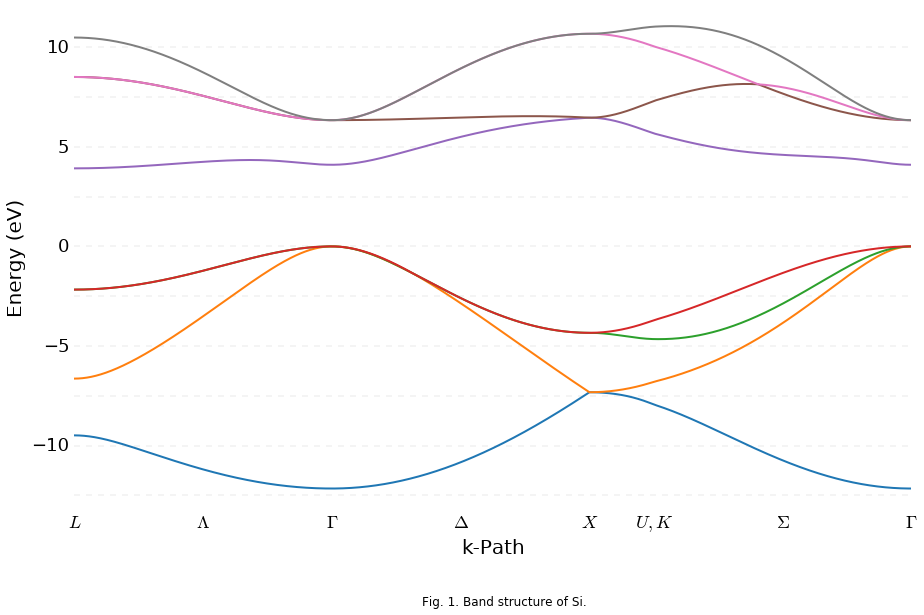

In [100]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(15, 9))

ax = plt.subplot(111)

# remove plot borders
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# limit plot area to data
plt.xlim(0, len(bands))
plt.ylim(min(bands[0]) - 1, max(bands[7]) + 1)

# custom tick names for k-points
xticks = n * np.array([0, 0.5, 1, 1.5, 2, 2.25, 2.75, 3.25])
plt.xticks(xticks, ('$L$', '$\Lambda$', '$\Gamma$', '$\Delta$', '$X$', '$U,K$', '$\Sigma$', '$\Gamma$'), fontsize=18)
plt.yticks(fontsize=18)

# horizontal guide lines every 2.5 eV
for y in np.arange(-25, 25, 2.5):
    plt.axhline(y, ls='--', lw=0.3, color='black', alpha=0.3)

# hide ticks, unnecessary with gridlines
plt.tick_params(axis='both', which='both',
                top='off', bottom='off', left='off', right='off',
                labelbottom='on', labelleft='on', pad=5)

plt.xlabel('k-Path', fontsize=20)
plt.ylabel('Energy (eV)', fontsize=20)

plt.text(1350, -18, 'Fig. 1. Band structure of Si.', fontsize=12)

# tableau 10 in fractional (r, g, b)
colors = 1 / 255 * np.array([
    [31, 119, 180],
    [255, 127, 14],
    [44, 160, 44],
    [214, 39, 40],
    [148, 103, 189],
    [140, 86, 75],
    [227, 119, 194],
    [127, 127, 127],
    [188, 189, 34],
    [23, 190, 207]
])

for band, color in zip(bands, colors):
    plt.plot(band, lw=2.0, color=color)

plt.show()

## IV. Results

As you can see our band structure is *smooth*, and very distinguishable. The valence bands show an unusually high degree of degeneracy, such that it makes it slightly difficult to differentiate each band without squinting. Comparing our band separations to Chadi and Cohen's$^2$ -- Fig. 2. -- you can see that they diverge quite significantly at several points, yet are quite accurate at others.

 | $\Gamma_{25'}$ | $\Gamma_{1}$ | $\Gamma_{15}$ | $\Gamma_{2'}$ | $L_{2'}$ | $L_1$ | $L_{3'}$ | $X_1$ | $X_4$ | $\Sigma\text{(0.5, 0.5, 0)}$ | $\Sigma\text{(0.7, 0.7, 0)}$
:--- | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---:
Calculated | 0 | -12.16 | 4.10 | 4.10 | -9.49 | -6.64 | -2.17 | -7.32 | -4.34 | -3.51 | -4.25
Chadi and Cohen$^2$ | 0 | -12.16 | 3.42 | 4.10 | -9.44 | -7.11 | -1.44 | -7.70 | -2.87 | -3.84 | -4.32

$$\scriptsize \text{Fig. 2. Energy splittings in eV at high-symmetry points of Silicon. Values are measured relative to } \Gamma_{25'} \text{.}$$

Our bandgap was calculated to be $E_{gap}$ = 3.92 eV, significantly different from the literature value of 1.11 eV$^1$.

## V. Conclusion

The physics behind the tight-binding method are far simpler than those of the pseudopotential method or density functional theory, however with the simplistic approximation comes weaker computational accuracy.

Our unusual variations in separation energies are the consequence of leaving out second nearest-neighbor interactions, and are akin to a very crude approximation. To get accurate values, we will have to reconfigure our matrix to accept the second nearest-neighbor parameter that Chadi and Cohen put to use. As it stands, the tight-binding method with only first nearest-neighbors is a quaint exercise, but should not be used in calculations.

That being said, this is a much less computationally taxing process than the pseudopotential method. If it were simple enough to implement interactions between second nearest-neighbors, the tight-binding method would be a prime candidate for approximating band structures.

## VI. References

1. G. Pfanner, "Tight-binding calculation of the band structure of Silicon," downloaded November, 2015
2. D.J. Chadi and M.L. Cohen, "Tight-binding calculations of the valence bands of diamond and zincblende crystals," phys. stat. sol. (b) 68, 405 (1975)